## LONG SHORT TERM MEMORY FOR VISA STOCK

An LSTM Network has its origin in a RNN. But it can solve the memory loss by changing the neuron architecture.

The new neuron has 3 gates, each with a different goal. The gates are:

1.Input Gate

2.Output Gate

3.Forget Gate

An LSTM Neuron still receives as input its previous state:

LSTM Neuron passing as parameter its previous state.

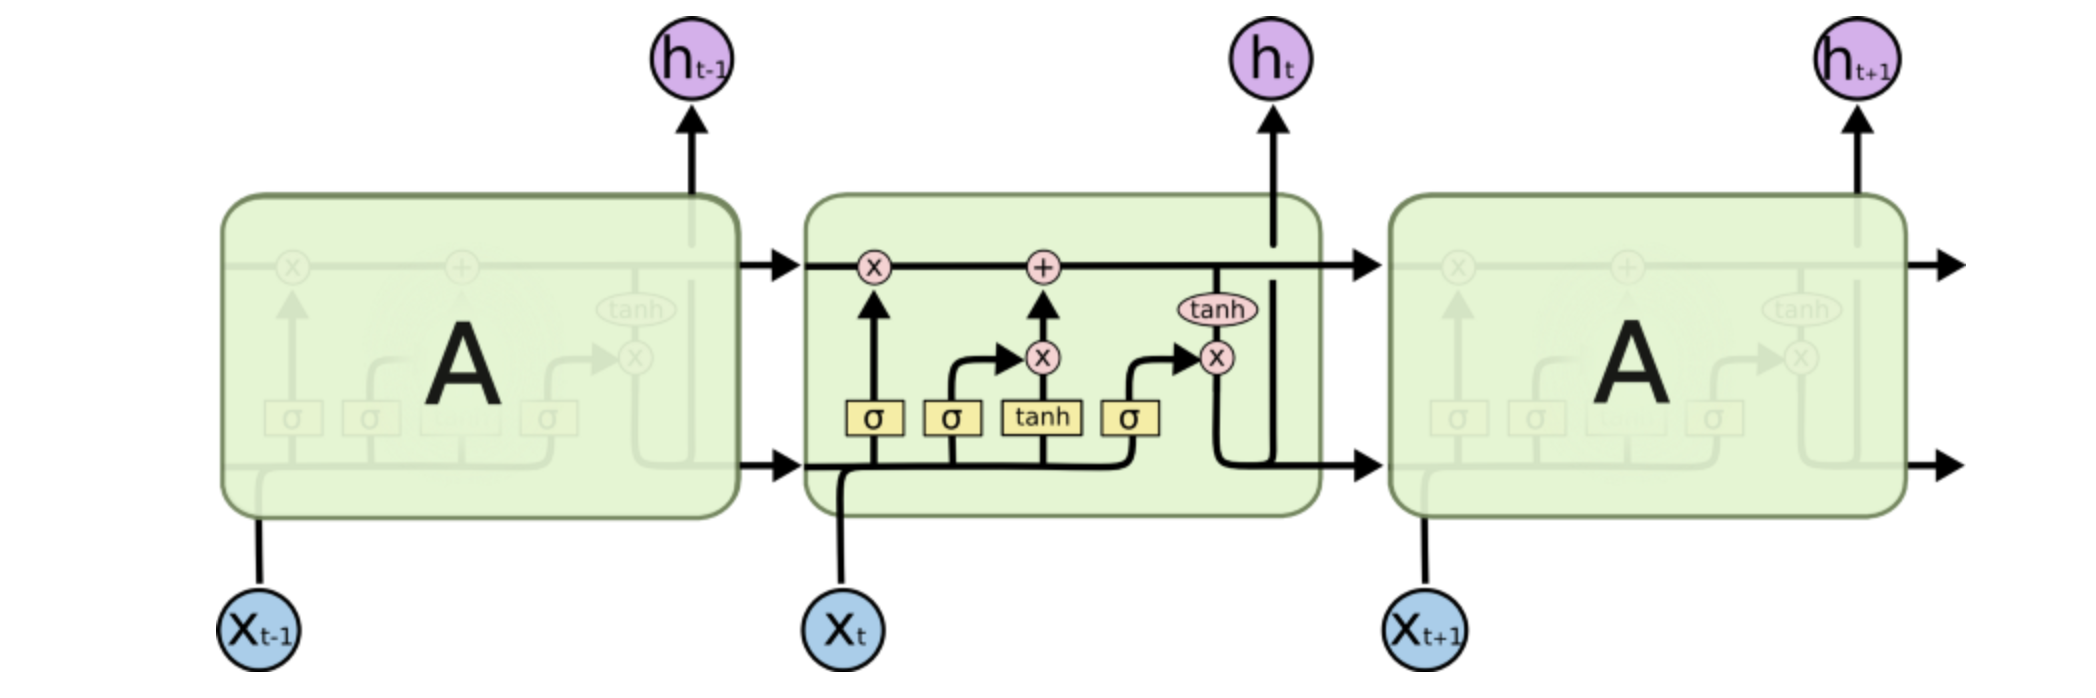

#### Following steps are done:

1. Clean up the data-Remove any NAs

2. Create a test, train and validate set

3. Create train for Close Price

4. Normalize data

5. Train, test data and check with validation set

6. Make a prediction

7. Based on this prediction find if the feature extraction method of LSTM works

In [47]:
# Importing all the required packages and libraries

import math
from math import sqrt
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, Activation

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [48]:
#Fetching data for Visa Stock for 5 years

df = web.DataReader('V', data_source='yahoo', start='2014-01-01', end='2020-12-31') 
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,55.507500,54.875000,55.384998,55.252499,10654000.0,52.239883
2014-01-03,55.622501,55.057499,55.437500,55.290001,7809600.0,52.275337
2014-01-06,55.577499,54.897499,55.294998,54.957500,8577600.0,51.960968
2014-01-07,55.527500,55.115002,55.187500,55.377499,8178000.0,52.358070
2014-01-08,55.750000,55.160000,55.355000,55.555000,8487200.0,52.525890
2014-01-09,56.130001,55.415001,55.887501,55.477501,8386400.0,52.452618
2014-01-10,55.685001,55.002499,55.459999,55.282501,6429600.0,52.268253
2014-01-13,56.047501,54.652500,55.505001,54.724998,13554400.0,51.741142
2014-01-14,55.662498,54.582500,54.685001,55.662498,10851600.0,52.627522


In [49]:
print(df.shape)

(1763, 6)


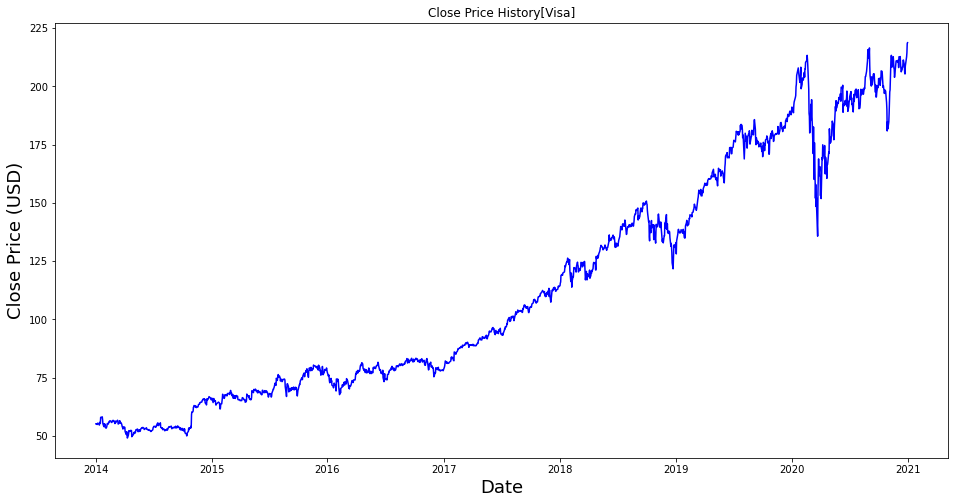

In [50]:
# Visualize the closing price history for Visa stock

plt.figure(figsize=(16,8))
plt.title('Close Price History[Visa]')
plt.plot(df['Close'], color='b')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [51]:
# Create a new dataframe with only the 'Close' column.
data = df.filter(['Close'])

# Converting the dataframe to a numpy array.
dataset = data.values

# Compute the number of rows to train the model on.

training_data_len = math.ceil( len(dataset) *.8)

In [52]:
# Min-Max Normalization.
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [53]:
# Create the scaled training dataset.
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train data sets
X_train=[]
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [54]:
# Convert x_train and y_train to numpy arrays.
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:
# Reshape the data into the shape accepted by the LSTM.
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [56]:
# Build the LSTM network model.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Activation('linear'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 25)                7600      
                                                                 
 activation_2 (Activation)   (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile the model.
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
# Train the model.
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1351/1351 [==============================] - 10s 6ms/step - loss: 9.7555e-04
Epoch 2/5
1351/1351 [==============================] - 9s 7ms/step - loss: 4.4113e-04
Epoch 3/5
1351/1351 [==============================] - 8s 6ms/step - loss: 2.9123e-04
Epoch 4/5
1351/1351 [==============================] - 8s 6ms/step - loss: 2.6129e-04
Epoch 5/5
1351/1351 [==============================] - 8s 6ms/step - loss: 2.0581e-04


In [59]:
# Test dataset.
test_data = scaled_data[training_data_len-60:, :]

# Create the x_test and y_test datasets.
X_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [60]:
# Convert x_test to a numpy array.
X_test = np.array(X_test)

In [61]:
# Reshape the data into the shape accepted by the LSTM.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [62]:
# Getting the models predicted price values.
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling

In [63]:
# Calculate/Get the value of RMSE.
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
mse = mean_squared_error(predictions,y_test)
rmse_new = sqrt(mse)
r = r2_score(predictions,y_test)

In [64]:
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)

RMSE = {} 4.51070516735174
R-Squared Score = {} 0.8903871683648328


In [65]:
# Plot/Create the data for the graph.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

RMSE = {} 4.51070516735174
R-Squared Score = {} 0.8903871683648328


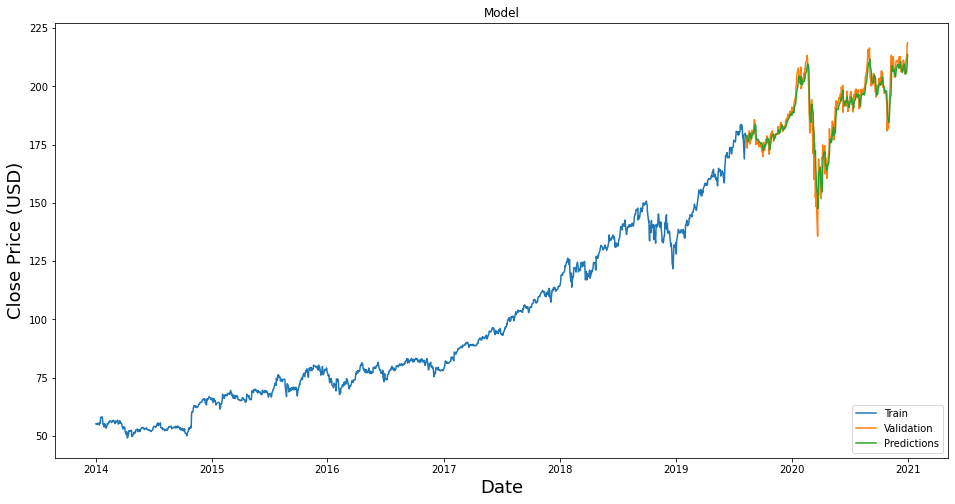

In [66]:
# Visualize the data.
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [67]:
valid

,Close,Predictions
Date,,
2019-08-12,176.339996,178.829269
2019-08-13,178.610001,178.413376
2019-08-14,173.509995,178.541885
2019-08-15,176.270004,176.581848
2019-08-16,178.229996,176.125549
...,...,...
2020-12-24,208.699997,205.258972
2020-12-28,212.630005,205.964142
2020-12-29,214.369995,208.428650


In [68]:
results = valid.rename(columns={"Close":"actual", "Predictions":"Predicted"}).copy()

###  1 Buy & Hold Trading Strategy
 
* Position trading 
* Buy if we have next days predicted_value greater than todays close value and hold if already bought 
* Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [69]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(results)-1):
    if results['Predicted'][i+1] > results['actual'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / results['actual'][i])
            balance = int(amount % results['actual'][i])
            portfolio = stocks * results['actual'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',results['actual'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', 
                  stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * results['actual'][i]
            amount = portfolio + balance
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,
                  'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif results['Predicted'][i+1] < results['actual'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * results['actual'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,
                  'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')

Stock: 176.33999633789062 Action: Buy Portfolio: 9875.04 Stocks: 56 Balance_init: 124 total($) 9999.04


Stock: 178.61000061035156 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10126.16


Stock: 173.50999450683594 Action: Buy Portfolio: 10063.58 Stocks: 58 Balance_init: 62 total($) 10125.58


Stock: 176.27000427246094 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10285.66


Stock: 178.22999572753906 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10285.66


Stock: 179.74000549316406 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10285.66


Stock: 179.24000549316406 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10285.66


Stock: 180.94000244140625 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10285.66


Stock: 180.08999633789062 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_i

Stock: 215.7100067138672 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 15465.62


Stock: 211.99000549316406 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 15465.62


Stock: 213.35000610351562 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 15465.62


Stock: 216.47999572753906 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 15465.62


Stock: 208.9600067138672 Action: Buy Portfolio: 15463.04 Stocks: 74 Balance_init: 2 total($) 15465.04


Stock: 204.66000366210938 Action: Bought--Holding Portfolio: 15144.84 Stocks: 74 Balance_init: 2 total($) 15146.84


Stock: 200.1199951171875 Action: Bought--Holding Portfolio: 14808.88 Stocks: 74 Balance_init: 2 total($) 14810.88


Stock: 204.05999755859375 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 15102.44


Stock: 201.5399932861328 Action: Buy Portfolio: 14913.96 Stocks: 74 Ba

In [70]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 15279.0 $
Profit_Percent: 152.79 %


In [74]:
results

,actual,Predicted
Date,,
2019-08-12,176.339996,178.829269
2019-08-13,178.610001,178.413376
2019-08-14,173.509995,178.541885
2019-08-15,176.270004,176.581848
2019-08-16,178.229996,176.125549
...,...,...
2020-12-24,208.699997,205.258972
2020-12-28,212.630005,205.964142
2020-12-29,214.369995,208.428650


In [80]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':results["actual"][1:],
                                 'Predicted_Close_Price':results["Predicted"][1:].values.tolist(),
                                 'Date': results.index[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
Date,,,,,,,
2019-08-13,178.610001,178.413376,2019-08-13,Buy,56,9875.03979,9999.0
2019-08-14,173.509995,178.541885,2019-08-14,Sell,0,0.00000,10126.0
2019-08-15,176.270004,176.581848,2019-08-15,Buy,58,10063.57968,10126.0
2019-08-16,178.229996,176.125549,2019-08-16,Sell,0,0.00000,10286.0
2019-08-19,179.740005,176.887482,2019-08-19,Price-Prediction-Already-Lower,0,0.00000,10286.0


In [84]:
Strategy_Result = Strategy_Result.drop("Date", axis=1)
Strategy_Result.reset_index(inplace=True)

<AxesSubplot:title={'center':'Total Amount'}>

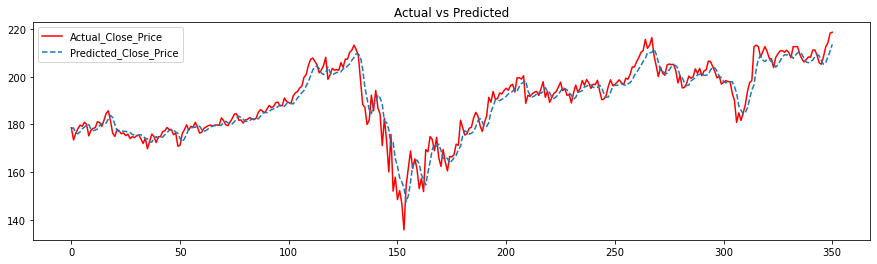

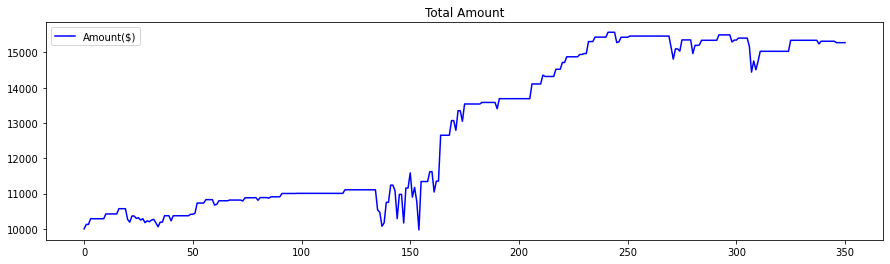

In [85]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-r','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-b'], 
                                            title = 'Total Amount')

In [86]:
Strategy_Result['Returns'] = Strategy_Result['Amount($)'].pct_change()

In [87]:
mean_returns = Strategy_Result['Returns'].mean()
sd = Strategy_Result['Returns'].std()
Sharpe_Ratio = np.sqrt(100)*(mean_returns)/sd
Sharpe_Ratio

0.78843350228289